In [2]:
import pandas as pd

file_path = '每日行情/百邦科技(300736.SZ)_每日行情数据统计.xlsx'
df = pd.read_excel(file_path, skiprows=2, nrows=1691)

# 现在 df 包含第3行到第1693行的数据

c:\Users\93516\anaconda3\envs\times_series\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
df

,交易日期,开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交额(元),收盘价有效
0,2018-01-09,23.02,27.62,23.02,27.62,"7,400","203,698.00",True
1,2018-01-10,30.38,30.38,30.38,30.38,"1,600","48,608.00",True
2,2018-01-11,33.42,33.42,33.42,33.42,"4,000","133,680.00",True
3,2018-01-12,36.76,36.76,36.76,36.76,"8,900","327,164.00",True
4,2018-01-15,40.44,40.44,40.44,40.44,"27,101","1,095,964.44",True
...,...,...,...,...,...,...,...,...
1685,2024-12-19,11.61,11.80,11.30,11.62,"9,742,280","112,216,401.00",True
1686,2024-12-20,11.52,12.62,11.52,12.40,"18,968,984","231,786,159.56",True
1687,2024-12-23,12.40,12.48,10.85,11.10,"18,675,409","213,863,622.95",True
1688,2024-12-24,11.14,11.30,10.32,10.57,"12,694,504","135,176,363.16",True


In [9]:
# 检查所有数据是否有缺失值
missing_values = df.isnull().sum()
print("各列缺失值数量：")
print(missing_values)

各列缺失值数量：
交易日期      0
开盘价(元)    0
最高价(元)    0
最低价(元)    0
收盘价(元)    0
成交量(股)    0
成交额(元)    0
收盘价有效     0
dtype: int64


In [7]:
# 检查收盘价是否在最低价和最高价之间
df['收盘价有效'] = df.apply(
    lambda row: row['最低价(元)'] <= row['收盘价(元)'] <= row['最高价(元)'], axis=1
)

# 计算错误的日期数量
error_count = df[~df['收盘价有效']].shape[0]

# 计算错误日期占比
error_percentage = (error_count / len(df)) * 100

print(f"存在 {error_count} 个收盘价异常日期，占比 {error_percentage:.2f}%")

存在 0 个收盘价异常日期，占比 0.00%


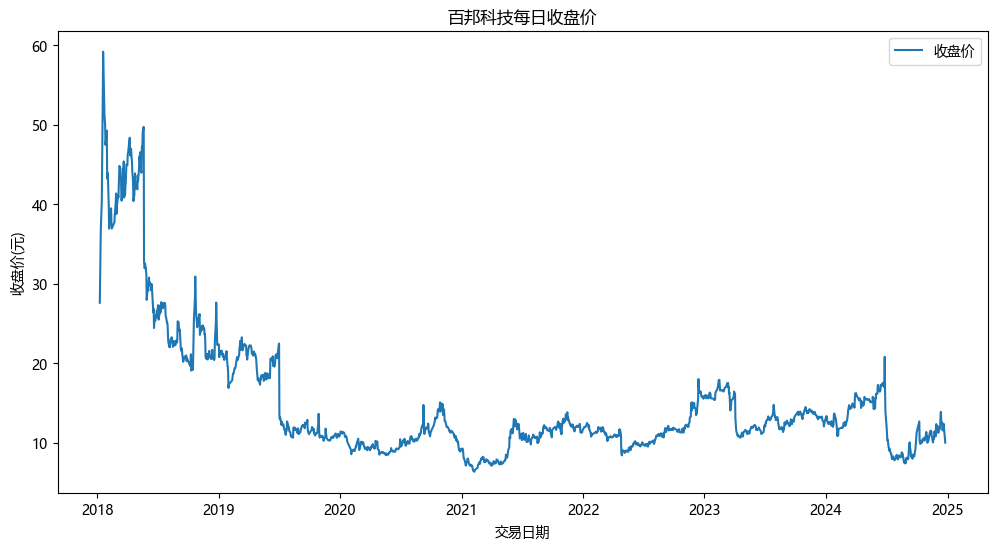

In [5]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 转换交易日期为datetime类型
df['交易日期'] = pd.to_datetime(df['交易日期'])

plt.figure(figsize=(12, 6))
plt.plot(df['交易日期'], df['收盘价(元)'], label='收盘价')
plt.xlabel('交易日期')
plt.ylabel('收盘价(元)')
plt.title('百邦科技每日收盘价')
plt.legend()
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# 设置交易日期为索引
df.set_index('交易日期', inplace=True)

# 选择收盘价作为时间序列
ts = df['收盘价(元)']

In [16]:
ts

交易日期
2018-01-09    27.62
2018-01-10    30.38
2018-01-11    33.42
2018-01-12    36.76
2018-01-15    40.44
              ...  
2024-12-19    11.62
2024-12-20    12.40
2024-12-23    11.10
2024-12-24    10.57
2024-12-25    10.02
Name: 收盘价(元), Length: 1690, dtype: float64

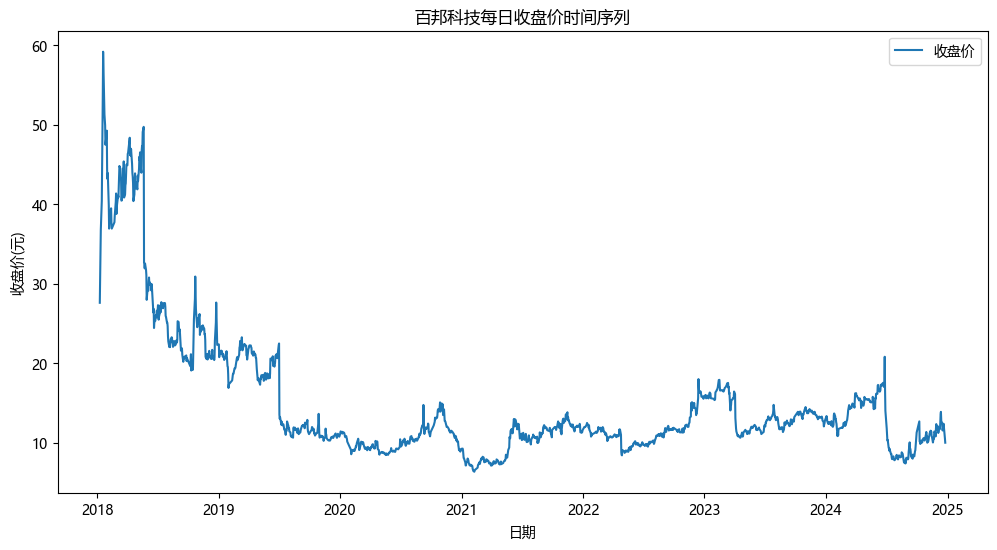

In [12]:
# 可视化时间序列
plt.figure(figsize=(12, 6))
plt.plot(ts, label='收盘价')
plt.xlabel('日期')
plt.ylabel('收盘价(元)')
plt.title('百邦科技每日收盘价时间序列')
plt.legend()
plt.show()

In [13]:
# 检查平稳性
result = adfuller(ts)
print('ADF统计量:', result[0])
print('p值:', result[1])
for key, value in result[4].items():
    print('临界值 %s: %.3f' % (key, value))

ADF统计量: -4.019134443201096
p值: 0.0013135661297215152
临界值 1%: -3.434
临界值 5%: -2.863
临界值 10%: -2.568


In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# Ljung-Box 白噪声检验
lb_test = acorr_ljungbox(ts, lags=[10], return_df=True)
print(lb_test)

         lb_stat  lb_pvalue
10  15518.929355        0.0


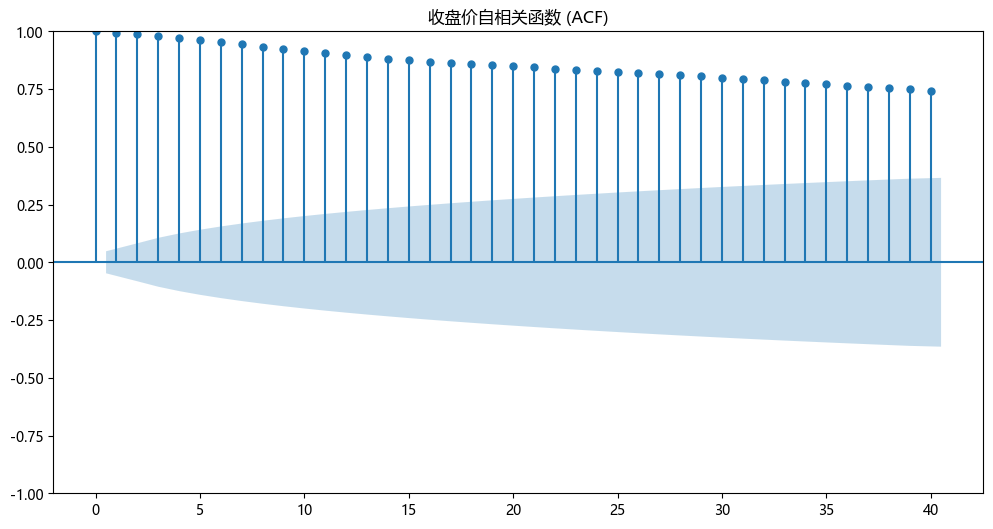

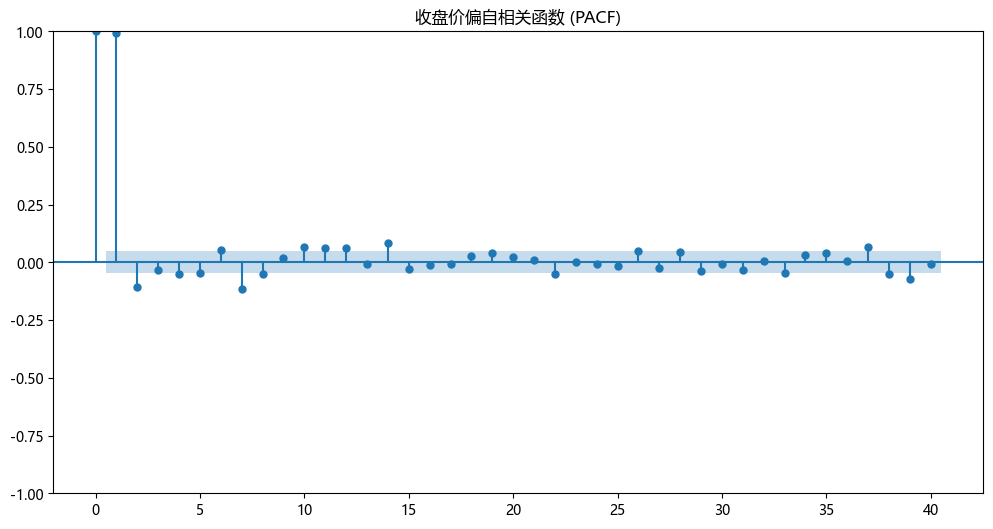

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制自相关函数 (ACF) 图
plt.figure(figsize=(12, 6))
plot_acf(ts, lags=40, ax=plt.gca())
plt.title('收盘价自相关函数 (ACF)')
plt.show()
# 绘制偏自相关函数 (PACF) 图
plt.figure(figsize=(12, 6))
plot_pacf(ts, lags=40, ax=plt.gca(), method='ywm')
plt.title('收盘价偏自相关函数 (PACF)')
plt.show()

In [21]:
from statsmodels.tsa.stattools import kpss

# KPSS 检验
kpss_stat, p_value, lags, critical_values = kpss(ts, regression='c')
print('\nKPSS统计量:', kpss_stat)
print('p值:', p_value)
print('临界值:', critical_values)

# 解释 KPSS 检验结果
if p_value < 0.05:
    print("KPSS检验结果显著，拒绝原假设，序列是非平稳的。")
else:
    print("KPSS检验结果不显著，无法拒绝原假设，序列是平稳的。")

# 处理 InterpolationWarning 的情况
if p_value == 0.01 and kpss_stat > max(critical_values.values()):
    print("\n注意: 测试统计量超出了可用 p 值查找表的范围，实际 p 值可能更小。")


KPSS统计量: 2.3776017836176147
p值: 0.01
临界值: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS检验结果显著，拒绝原假设，序列是非平稳的。

注意: 测试统计量超出了可用 p 值查找表的范围，实际 p 值可能更小。


C:\Users\93516\AppData\Local\Temp\ipykernel_37152\3130829703.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(ts, regression='c')


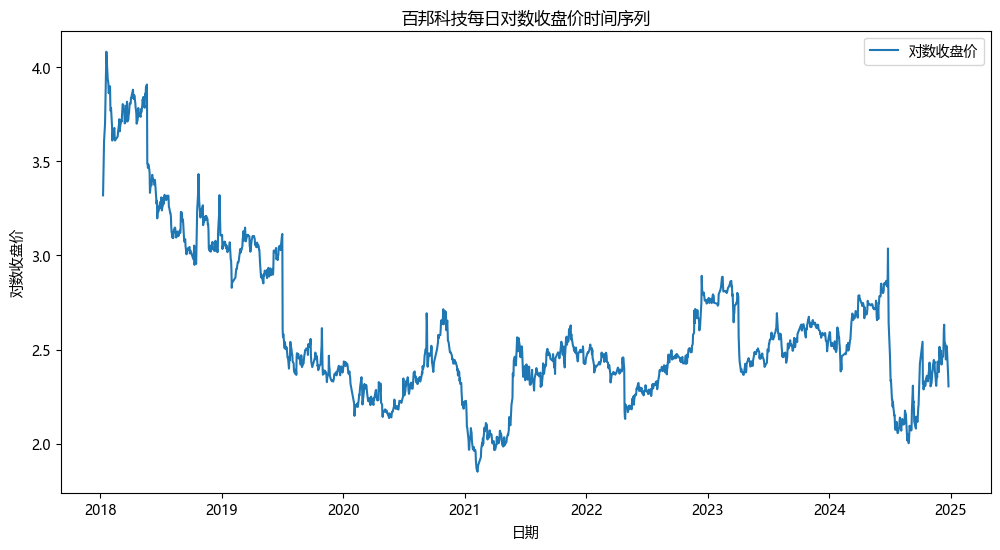

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 对收盘价取自然对数
ts_log = np.log(ts)

# 可视化对数后的时间序列
plt.figure(figsize=(12, 6))
plt.plot(ts_log, label='对数收盘价')
plt.xlabel('日期')
plt.ylabel('对数收盘价')
plt.title('百邦科技每日对数收盘价时间序列')
plt.legend()
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller (ADF) 检验
adf_result_log = adfuller(ts_log)
print('ADF统计量:', adf_result_log[0])
print('p值:', adf_result_log[1])
for key, value in adf_result_log[4].items():
    print(f'临界值 {key}: {value}')

if adf_result_log[1] < 0.05:
    print("ADF检验结果显著，拒绝原假设，序列是平稳的。")
else:
    print("ADF检验结果不显著，无法拒绝原假设，序列可能是非平稳的。")

# KPSS 检验
kpss_stat_log, p_value_log, lags_log, critical_values_log = kpss(ts_log, regression='c')
print('\nKPSS统计量:', kpss_stat_log)
print('p值:', p_value_log)
print('临界值:', critical_values_log)

if p_value_log < 0.05:
    print("KPSS检验结果显著，拒绝原假设，序列是非平稳的。")
else:
    print("KPSS检验结果不显著，无法拒绝原假设，序列是平稳的。")

# 处理 InterpolationWarning 的情况
if p_value_log == 0.01 and kpss_stat_log > max(critical_values_log.values()):
    print("\n注意: 测试统计量超出了可用 p 值查找表的范围，实际 p 值可能更小。")

ADF统计量: -2.49582509697574
p值: 0.11649343115762012
临界值 1%: -3.434229900586754
临界值 5%: -2.8632537573140975
临界值 10%: -2.5676823602485346
ADF检验结果不显著，无法拒绝原假设，序列可能是非平稳的。

KPSS统计量: 2.2293000857695273
p值: 0.01
临界值: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS检验结果显著，拒绝原假设，序列是非平稳的。

注意: 测试统计量超出了可用 p 值查找表的范围，实际 p 值可能更小。


C:\Users\93516\AppData\Local\Temp\ipykernel_37152\2223253508.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat_log, p_value_log, lags_log, critical_values_log = kpss(ts_log, regression='c')


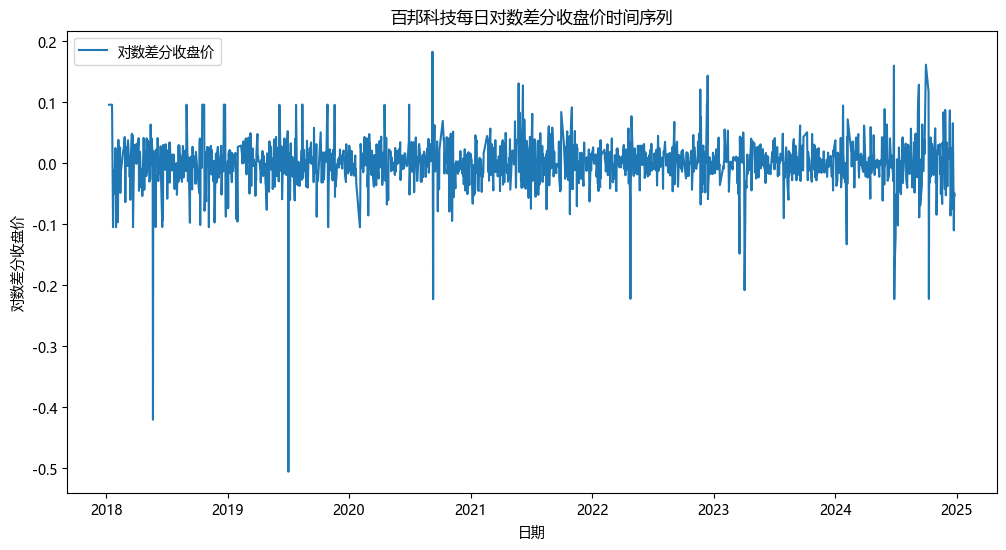

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 对数差分以提高平稳性
ts_log_diff = ts_log.diff().dropna()

# 可视化对数差分后的时间序列
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label='对数差分收盘价')
plt.xlabel('日期')
plt.ylabel('对数差分收盘价')
plt.title('百邦科技每日对数差分收盘价时间序列')
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller (ADF) 检验
adf_result_diff = adfuller(ts_log_diff)
print('ADF统计量:', adf_result_diff[0])
print('p值:', adf_result_diff[1])
for key, value in adf_result_diff[4].items():
    print(f'临界值 {key}: {value}')

if adf_result_diff[1] < 0.05:
    print("ADF检验结果显著，拒绝原假设，序列是平稳的。")
else:
    print("ADF检验结果不显著，无法拒绝原假设，序列可能是非平稳的。")

# KPSS 检验
kpss_stat_diff, p_value_diff, lags_diff, critical_values_diff = kpss(ts_log_diff, regression='c')
print('\nKPSS统计量:', kpss_stat_diff)
print('p值:', p_value_diff)
print('临界值:', critical_values_diff)

if p_value_diff < 0.05:
    print("KPSS检验结果显著，拒绝原假设，序列是非平稳的。")
else:
    print("KPSS检验结果不显著，无法拒绝原假设，序列是平稳的。")

# 处理 InterpolationWarning 的情况
if p_value_diff == 0.01 and kpss_stat_diff > max(critical_values_diff.values()):
    print("\n注意: 测试统计量超出了可用 p 值查找表的范围，实际 p 值可能更小。")

ADF统计量: -19.827403622301457
p值: 0.0
临界值 1%: -3.434239130607915
临界值 5%: -2.8632578315742134
临界值 10%: -2.5676845297222424
ADF检验结果显著，拒绝原假设，序列是平稳的。

KPSS统计量: 0.06506177131845015
p值: 0.1
临界值: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS检验结果不显著，无法拒绝原假设，序列是平稳的。


C:\Users\93516\AppData\Local\Temp\ipykernel_37152\1509042393.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat_diff, p_value_diff, lags_diff, critical_values_diff = kpss(ts_log_diff, regression='c')


In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box 白噪声检验
lb_test = acorr_ljungbox(ts_log_diff, lags=[10], return_df=True)
print(lb_test)

# 解释检验结果
if lb_test['lb_pvalue'].iloc[0] < 0.05:
    print("序列不是白噪声，有自相关性。")
else:
    print("序列是白噪声，没有自相关性。")

      lb_stat  lb_pvalue
10  19.842461   0.030778
序列不是白噪声，有自相关性。


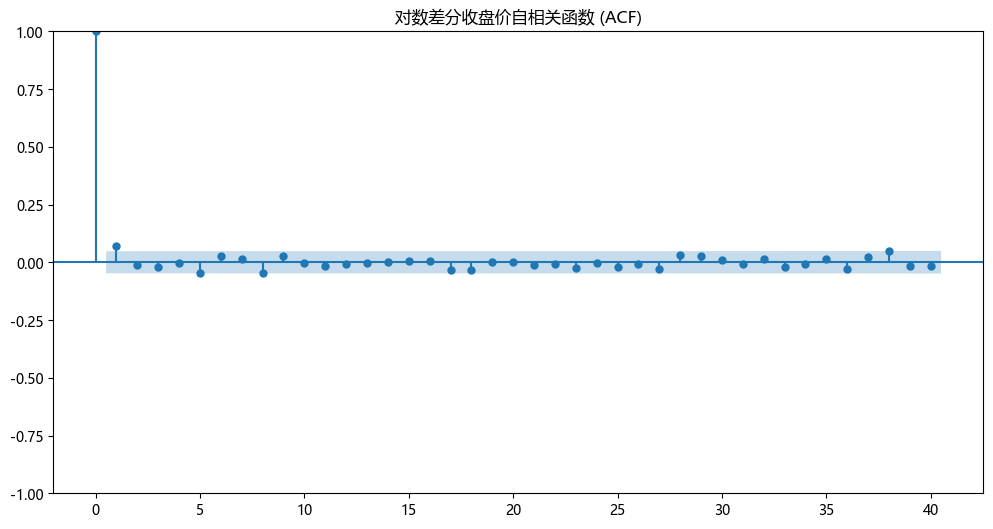

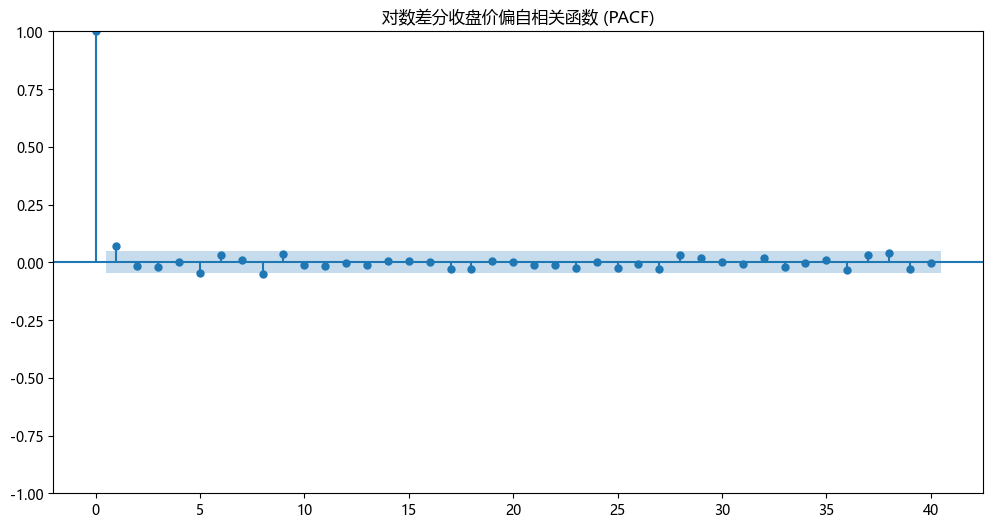

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 绘制自相关函数 (ACF) 图
plt.figure(figsize=(12, 6))
plot_acf(ts_log_diff, lags=40, ax=plt.gca())
plt.title('对数差分收盘价自相关函数 (ACF)')
plt.show()

# 绘制偏自相关函数 (PACF) 图
plt.figure(figsize=(12, 6))
plot_pacf(ts_log_diff, lags=40, ax=plt.gca(), method='ywm')
plt.title('对数差分收盘价偏自相关函数 (PACF)')
plt.show()